In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
# This dataset is from Bank marketing department
# The dependent variable is y which denotes if the customers 
# have bought the term deposit (yes/no)

In [8]:
# Data dictionary
#   1 - age (numeric)
#   2 - job : type of job (categorical: "admin.","blue-collar",
# "entrepreneur","housemaid","management","retired","self-employed",
# "services","student","technician","unemployed","unknown")
#   3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
#   4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
#   5 - default: has credit in default? (categorical: "no","yes","unknown")
#   6 - housing: has housing loan? (categorical: "no","yes","unknown")
#   7 - loan: has personal loan? (categorical: "no","yes","unknown")
#   # related with the last contact of the current campaign:
#   8 - contact: contact communication type (categorical: "cellular","telephone") 
#   9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
#  10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
#  11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
#   # other attributes:
#  12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
#  13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
#  14 - previous: number of contacts performed before this campaign and for this client (numeric)
#  15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
#   # social and economic context attributes
#  16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
#  17 - cons.price.idx: consumer price index - monthly indicator (numeric)     
#  18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
#  19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
#  20 - nr.employed: number of employees - quarterly indicator (numeric)

#  Output variable (desired target):
#  21 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [44]:
# import libraries
import pandas as pd

# set working directory
import os
os.chdir("I:\\makeit")

# check working directory
os.getcwd()

'I:\\makeit'

In [45]:
# read data
bankdata = pd.read_csv('bankcustomers.csv', sep=';')

In [46]:
# check if data is loaded properly
bankdata.head(4)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no


In [47]:
# check dimensions of loaded data
bankdata.shape

(4119, 21)

In [48]:
# check column names
bankdata.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

In [49]:
# check data types
bankdata.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [50]:
# we will need to convert yes/no for the dependent variable
# to 1 and 0
# we can use astype() method to convert T/F to 1/0
bankdata['y'] = (bankdata['y']=='yes').astype(int)

In [51]:
# check data types
bankdata.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int32
dtype: object

In [52]:
# check the conversion of yes/no to 1/0
bankdata.tail(4)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,0
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,0
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,0
4118,34,management,single,high.school,no,yes,no,cellular,nov,wed,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,0


In [53]:
# Data exploration
# Count of customers who bought the term deposit
bankdata['y'].value_counts()

0    3668
1     451
Name: y, dtype: int64

In [54]:
# See the unique values in education column
bankdata['education'].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [55]:
# we see basic.9y, basic.6y, basic.4y - we can club them to basic
import numpy as np
bankdata['education']=np.where(bankdata['education']=='basic.9y', \
                               'Basic', bankdata['education'])
bankdata['education']=np.where(bankdata['education']=='basic.6y', \
                               'Basic', bankdata['education'])
bankdata['education']=np.where(bankdata['education']=='basic.4y', \
                               'Basic', bankdata['education'])

In [56]:
# Data exploration
# For numerical variables let us see the average across term deposit buyers
bankdata.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


In [57]:
# Data exploration
# For numerical variables let us see the average across education
bankdata.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
Basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144,0.079610
high.school,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320
illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000,0.000000
professional.course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
university.degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538
unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479,0.155689


In [58]:
# Data exploration
# For numerical variables let us see the average across term deposit buyers & education
bankdata.groupby(['y', 'education']).mean()


age    duration  campaign       pdays  previous  \
y education                                                                    
0 Basic                41.919682  215.981465  2.443071  987.609003  0.127979   
  high.school          37.905340  223.877427  2.699029  982.118932  0.160194   
  illiterate           42.000000  146.000000  4.000000  999.000000  0.000000   
  professional.course  40.051064  235.038298  2.587234  984.221277  0.144681   
  university.degree    39.005460  211.000000  2.704277  978.219290  0.135578   
  unknown              41.659574  234.822695  2.652482  978.028369  0.184397   
1 Basic                47.163265  692.265306  2.275510  877.153061  0.397959   
  high.school          39.731959  552.938144  2.051546  753.329897  0.597938   
  professional.course  41.338462  595.369231  1.969231  770.138462  0.553846   
  university.degree    39.096970  492.200000  1.775758  745.957576  0.684848   
  unknown              49.153846  443.307692  1.923077  731.846154  0.692308   

                       emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
y education                                                                     
0 Basic                    0.302471       93.665793     -41.133451   3.851942   
  high.school              0.155461       93.592246     -41.110680   3.696245   
  illiterate              -2.900000       92.201000     -31.400000   0.834000   
  professional.course      0.335957       93.620711     -40.098511   3.902466   
  university.degree        0.208917       93.521758     -39.951592   3.801442   
  unknown                  0.181560       93.658957     -39.774468   3.730730   
1 Basic                   -0.515306       93.575449     -40.971429   2.894265   
  high.school             -1.344330       93.327031     -40.019588   1.944320   
  professional.course     -1.080000       93.447200     -40.338462   2.247754   
  university.degree       -1.466061       93.348255     -39.020606   1.853273   
  unknown                 -1.461538       93.520846     -37.930769   1.671769   

                       nr.employed  
y education                         
0 Basic                5177.825066  
  high.school          5172.212985  
  illiterate           5076.200000  
  professional.course  5177.377234  
  university.degree    5175.830664  
  unknown              5167.949645  
1 Basic                5131.450000  
  high.school          5086.755670  
  professional.course  5096.863077  
  university.degree    5077.717576  
  unknown              5060.753846

In [59]:
# see count of yes/no by education level
pd.crosstab(bankdata.education, bankdata.y)

y,0,1
education,,
Basic,1133,98
high.school,824,97
illiterate,1,0
professional.course,470,65
university.degree,1099,165
unknown,141,26


Text(0,0.5,'# of purchases')

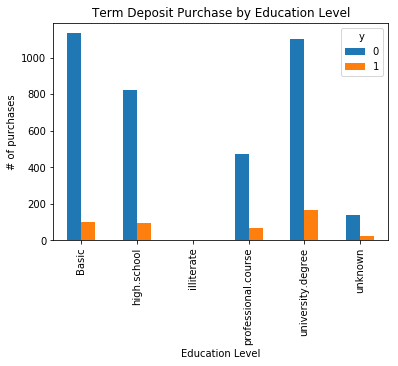

In [60]:
# visualize your data
# plot the above cross tab as bar chart
import matplotlib.pyplot as plt
%matplotlib inline

pd.crosstab(bankdata.education, bankdata.y).plot(kind='bar', stacked=False) # kind='line' can also be used
plt.title('Term Deposit Purchase by Education Level')
plt.xlabel('Education Level')
plt.ylabel('# of purchases')

In [61]:
# see count of yes/no by marital status
pd.crosstab(bankdata.marital, bankdata.y)

y,0,1
marital,,
divorced,403,43
married,2257,252
single,998,155
unknown,10,1


Text(0,0.5,'# of purchases')

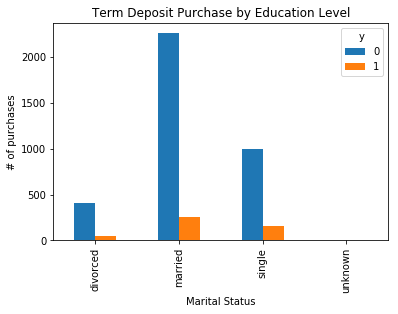

In [62]:
# visualize your data
# plot the cross tab (Marital Status Vs Purchase) as bar chart
%matplotlib inline

pd.crosstab(bankdata.marital, bankdata.y).plot(kind='bar', stacked=False) 
plt.title('Term Deposit Purchase by Education Level')
plt.xlabel('Marital Status')
plt.ylabel('# of purchases')

In [63]:
# see count of yes/no by Month
pd.crosstab(bankdata.month, bankdata.y)

y,0,1
month,,
apr,179,36
aug,572,64
dec,10,12
jul,652,59
jun,462,68
mar,20,28
may,1288,90
nov,403,43
oct,44,25


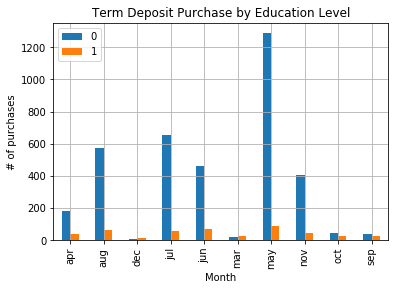

In [64]:
# visualize your data
# plot the cross tab (Month Vs Purchase) as bar chart
%matplotlib inline

pd.crosstab(bankdata.month, bankdata.y).plot(kind='bar', stacked=False, \
                                             grid=True) 

plt.title('Term Deposit Purchase by Education Level')
plt.xlabel('Month')
plt.ylabel('# of purchases')
plt.legend(loc='upper left')

Text(0,0.5,'Count')

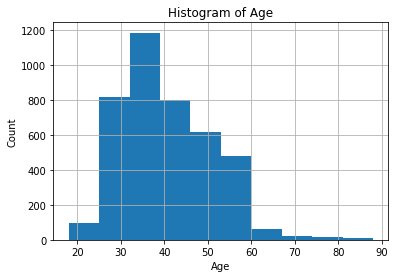

In [65]:
# visualize your data
# plot a histogram of age
%matplotlib inline

bankdata.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Count')


In [66]:
# FEATURE ENGINEERING
# Create dummy variables for categorical variables

# Steps:
    # Choose the variables which are categorical
    # Loop through each variable
        # Call get_dummies()

bankdata = pd.read_csv('bankcustomers.csv', sep=';')        
        
categorical_vars=['job', 'marital', 'education', 'default', \
                  'housing', 'loan', 'contact', 'month', \
                  'day_of_week', 'poutcome']
for each_variable in categorical_vars:
    category_list = pd.get_dummies(bankdata[each_variable], \
                                   prefix=each_variable)
    #print(category_list)
    newcolumn = bankdata.join(category_list)
    bankdata = newcolumn

In [67]:
bankdata.head(4)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,0,0,1,0,0,0,0,0,1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,0,0,1,0,0,0,0,0,1,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,0,0,0,0,0,0,1,0,1,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,0,0,1,0,0,0,0,0,1,0


In [68]:
# remove the actual categorical variables
categorical_vars=['job', 'marital', 'education', 'default', \
                  'housing', 'loan', 'contact', 'month', \
                  'day_of_week', 'poutcome']
print(categorical_vars)

all_variables = bankdata.columns.values.tolist()
print(' ')
#print(all_variables)

to_keep = [x for x in all_variables if x not in categorical_vars]
print(' ')
#print(to_keep)

final_bankdata = bankdata[to_keep]
final_bankdata.columns.values

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
 
 


array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'mo

In [69]:
# separate the predictor & response 
final_list_of_variables = final_bankdata.columns.values.tolist()
Y = ['y']
X = [x for x in final_list_of_variables if x not in Y]
print(X)

['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'marital_single', 'marital_unknown', 'education_basic.4y', 'education_basic.6y', 'education_basic.9y', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'education_unknown', 'default_no', 'default_unknown', 'default_yes', 'housing_no', 'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day

In [70]:
# Change Y of final_bank_data to 1/0
#final_bankdata['y'] = (final_bankdata['y']=='yes').astype(int)
final_bankdata['y'].dtype

dtype('O')

In [71]:
# Lets build Logistic Regression model using scikit-learn

# We will use Recursive Feature Elimination with Scikit Learn
# Not all features contribute to the prediction variable. 
# Removing features of low importance can improve accuracy, 
# and reduce both model complexity and overfitting. 
# Training time also gets reduced for very large datasets.

# The output from RFE has 2 arrays: Support and Ranking
# Columns with Support=TRUE and Ranking = 1 are selected 
# If we want columns with Rank > 1, increase the number of columns to be added

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()

rfe = RFE(logistic_model, 12)
rfe = rfe.fit(final_bankdata[X], final_bankdata[Y])

print(X)

print(rfe.support_)
print(rfe.ranking_)
print('')
print(rfe.get_support(indices=True))

['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'marital_single', 'marital_unknown', 'education_basic.4y', 'education_basic.6y', 'education_basic.9y', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'education_unknown', 'default_no', 'default_unknown', 'default_yes', 'housing_no', 'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day

In [72]:
Y = final_bankdata['y']
X = final_bankdata.iloc[:, [4,  8, 12, 16, 47, 48, 49, 50, 51, 53, 60, 62]]

In [73]:
X.columns.values

array(['previous', 'euribor3m', 'job_blue-collar', 'job_retired',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_nov', 'day_of_week_wed', 'poutcome_nonexistent'],
      dtype=object)

In [74]:
print(Y.shape)
print(X.shape)
print(type(Y))
print(type(X))
Y = Y.to_frame()
print(type(Y))

(4119,)
(4119, 12)
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [75]:
# We will use scikit-learn method to fit the model
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()
result = logistic_model.fit(X, Y)
result.score(X,Y)

0.8963340616654528

In [76]:
# generating the coefficients
import numpy as np
import pandas as pd
pd.DataFrame(list(zip(X.columns, np.transpose(result.coef_))))

,0,1
0,previous,[0.5076571353702829]
1,euribor3m,[-0.546496133920961]
2,job_blue-collar,[-0.3591553622507818]
3,job_retired,[0.35603838876396016]
4,month_aug,[0.6253983085949565]
5,month_dec,[1.1822172985978154]
6,month_jul,[0.9622633626968825]
7,month_jun,[1.0543179248209773]
8,month_mar,[1.6306366297798072]
9,month_nov,[0.45195768179106927]


In [77]:
# Let us now split the dataset into train & test
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, \
                                                    random_state=0)

C:\Users\thiru\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [78]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2883, 12)
(1236, 12)
(2883, 1)
(1236, 1)


In [79]:
# build model with train data
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()
result = logistic_model.fit(X_train, Y_train)

predicted = result.predict_proba(X_test)
predicted

# This gives the probability of negative & positive outcome for each row

array([[0.95462912, 0.04537088],
       [0.83762689, 0.16237311],
       [0.93244632, 0.06755368],
       ...,
       [0.65044409, 0.34955591],
       [0.97383524, 0.02616476],
       [0.57021896, 0.42978104]])

In [80]:
predicted_df = pd.DataFrame(predicted)
predicted_df.head(4)

,0,1
0,0.954629,0.045371
1,0.837627,0.162373
2,0.932446,0.067554
3,0.937856,0.062144


In [81]:
predicted_df = pd.DataFrame(predicted)

predicted_df['Predict'] = np.where(predicted_df[1]>=0.50, 1,0)
predicted_df.head(4)

,0,1,Predict
0,0.954629,0.045371,0
1,0.837627,0.162373,0
2,0.932446,0.067554,0
3,0.937856,0.062144,0


In [82]:
#Y_test['y']
#predicted_df['Predict']

# we can use astype() method to convert T/F to 1/0
Y_test['y'] = (Y_test['y']=='yes').astype(int)

In [83]:
# Checking the accuracy with test data
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test['y'], predicted_df['Predict']))

0.9004854368932039


In [84]:
# AUC
from sklearn.metrics import roc_auc_score 
roc_auc_score(Y_test['y'], predicted_df['Predict'])

0.5506445536686582

In [46]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(Y_test['y'], \
                                  predicted_df['Predict']).ravel()
(tn, fp, fn, tp)

(806, 308, 40, 82)